<a href="https://colab.research.google.com/github/geoifg/SMS/blob/main/Script_EDA_Titanic_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importar o dataset CSV
url = "https://raw.githubusercontent.com/geoifg/SMS/main/titanic.csv"
dataset = pd.read_csv(url, sep=";", decimal=".")

In [2]:
# Variáveis Categóricas: Survived, Sex, Pclass (ordinal), Embarked, Cabin, Name, Ticket, SibSp e Parch
# Variáveis Numéricas: Fare, Age e PassengerId

# Visualizar as primeiras linhas dos dados
print(dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171     7.25   NaN        S  
1      0          PC 17599  712.833   C85        C  
2      0  STON/O2. 3101282    7.925   NaN        S  
3      0            113803     53.1  C123        S  
4      0            373450     8.05   NaN        S  


In [3]:
# Estatística descritiva do dataframe
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000


In [4]:
# Verificar a estrutura do dado
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB
None


In [5]:
# Convertendo a coluna "Survived" para categórica (fator)
dataset['Survived'] = np.where(dataset['Survived'] == 1, 'Yes', 'No')
dataset['Survived'] = dataset['Survived'].astype('category')

In [6]:
# Convertendo a coluna "Fare" para numérica
dataset['Fare'] = pd.to_numeric(dataset['Fare'], errors='coerce')

In [7]:
# Dando um indicador claro do local do embarque
dataset['Embarked'] = np.where(dataset['Embarked'] == 'S', 'Southampton',
                               np.where(dataset['Embarked'] == 'C', 'Cherbourg', 'Queenstown'))
dataset['Embarked'] = dataset['Embarked'].astype('category')

In [8]:
# Excluindo as colunas "PassengerId", "Name", "Cabin" e "Ticket" do dataframe
dataset.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)


In [9]:
# Alterando algumas colunas como variáveis categóricas
dataset['Pclass'] = dataset['Pclass'].astype('category')
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['SibSp'] = dataset['SibSp'].astype('category')
dataset['Parch'] = dataset['Parch'].astype('category')

In [10]:
# Verificando estatística descritiva do dataframe
print(dataset.describe())

              Age        Fare
count  714.000000  868.000000
mean    29.699118   91.288425
std     14.526497  159.991488
min      0.420000    0.000000
25%     20.125000   10.500000
50%     28.000000   27.825000
75%     38.000000   78.958000
max     80.000000  910.792000


In [11]:
# Imputando valores ausentes na coluna "Age" com a mediana
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())

In [12]:
# Removendo linhas com células contendo valores NA
dataset = dataset.dropna()

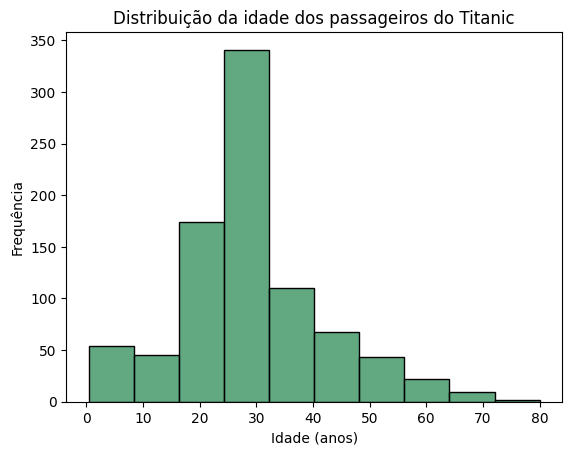

In [14]:
# Gráfico de barras com 10 barras
sns.histplot(data=dataset, x='Age', bins=10, color='seagreen')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.title('Distribuição da idade dos passageiros do Titanic')
plt.show()

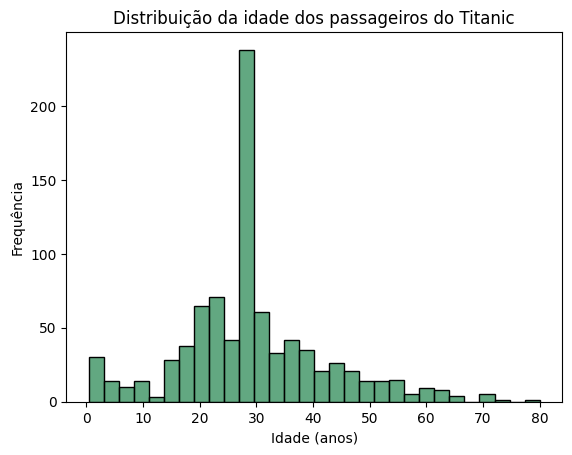

In [15]:
# Gráfico de barras com 30 barras (bins)
sns.histplot(data=dataset, x='Age', bins=30, color='seagreen')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.title('Distribuição da idade dos passageiros do Titanic')
plt.show()

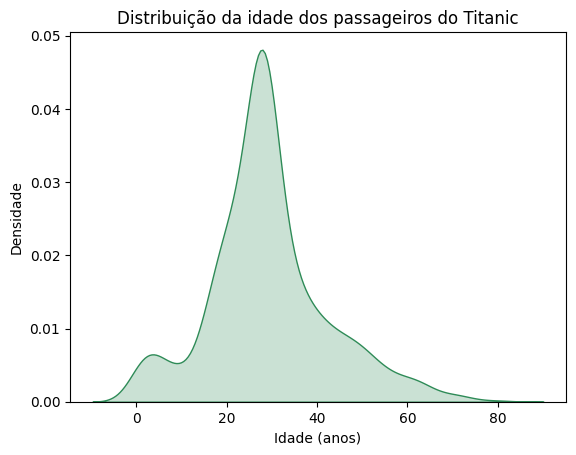

In [16]:
# Gráfico de densidade kernel
sns.kdeplot(data=dataset, x='Age', color='seagreen', fill=True)
plt.xlabel('Idade (anos)')
plt.ylabel('Densidade')
plt.title('Distribuição da idade dos passageiros do Titanic')
plt.show()

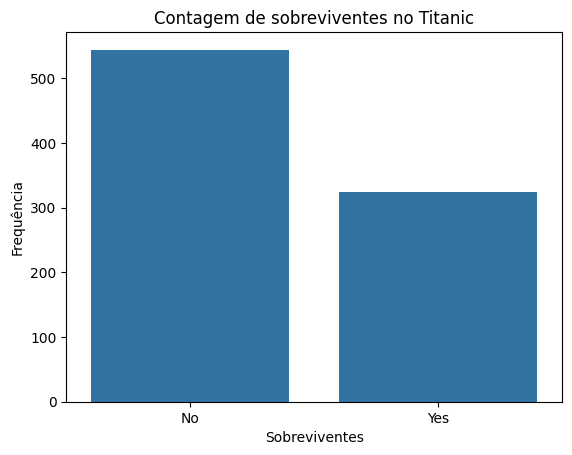

In [17]:
# Gráfico de barras
sns.countplot(data=dataset, x='Survived')
plt.xlabel('Sobreviventes')
plt.ylabel('Frequência')
plt.title('Contagem de sobreviventes no Titanic')
plt.show()

<ipython-input-18-0b27bcb045e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Survived', palette=['red', 'blue'])


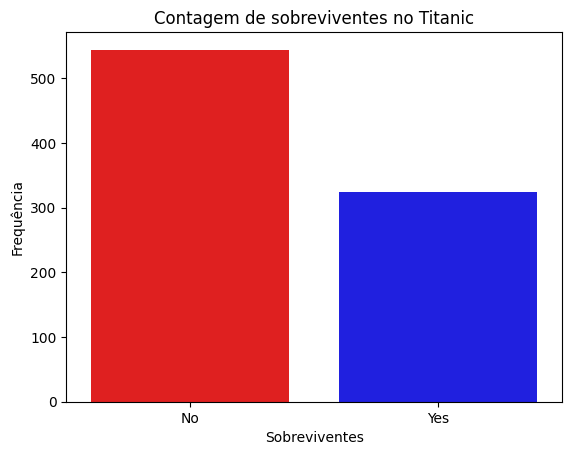

In [18]:
# Gráfico de barras com cores personalizadas
sns.countplot(data=dataset, x='Survived', palette=['red', 'blue'])
plt.xlabel('Sobreviventes')
plt.ylabel('Frequência')
plt.title('Contagem de sobreviventes no Titanic')
plt.show()

<ipython-input-19-5424c2d0aad8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, y='Survived', palette=['red', 'blue'])


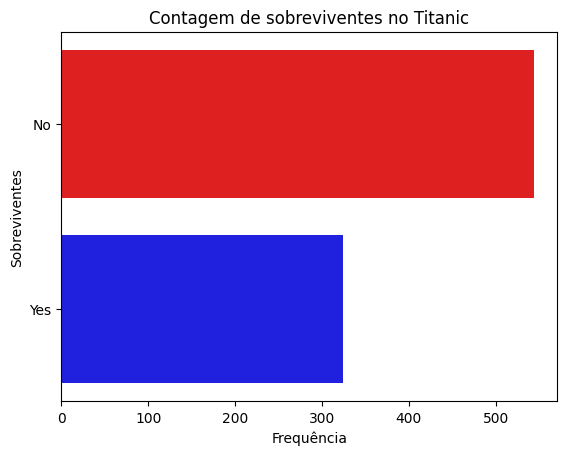

In [19]:
# Gráfico de barras horizontal com cores personalizadas
sns.countplot(data=dataset, y='Survived', palette=['red', 'blue'])
plt.xlabel('Frequência')
plt.ylabel('Sobreviventes')
plt.title('Contagem de sobreviventes no Titanic')
plt.show()

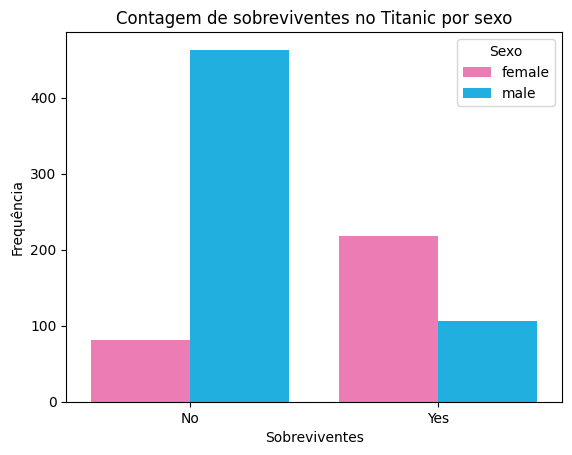

In [20]:
# Gráfico de barras com mais de uma variável
sns.countplot(data=dataset, x='Survived', hue='Sex', palette=['hotpink', 'deepskyblue'])
plt.xlabel('Sobreviventes')
plt.ylabel('Frequência')
plt.title('Contagem de sobreviventes no Titanic por sexo')
plt.legend(title='Sexo')
plt.show()

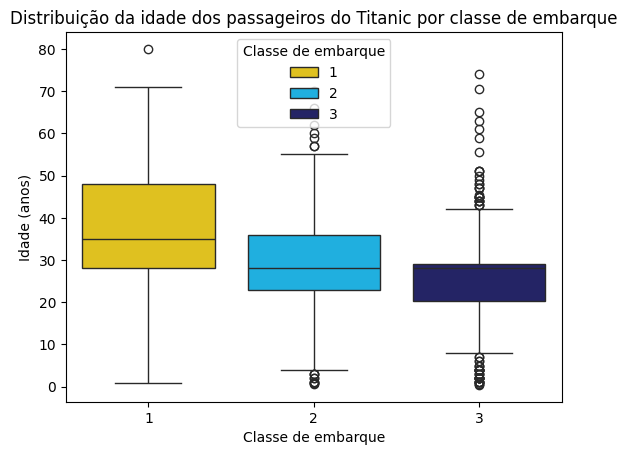

In [21]:
# Boxplot
sns.boxplot(data=dataset, x='Pclass', y='Age', hue='Pclass', palette=['gold', 'deepskyblue', 'midnightblue'])
plt.xlabel('Classe de embarque')
plt.ylabel('Idade (anos)')
plt.title('Distribuição da idade dos passageiros do Titanic por classe de embarque')
plt.legend(title='Classe de embarque')
plt.show()

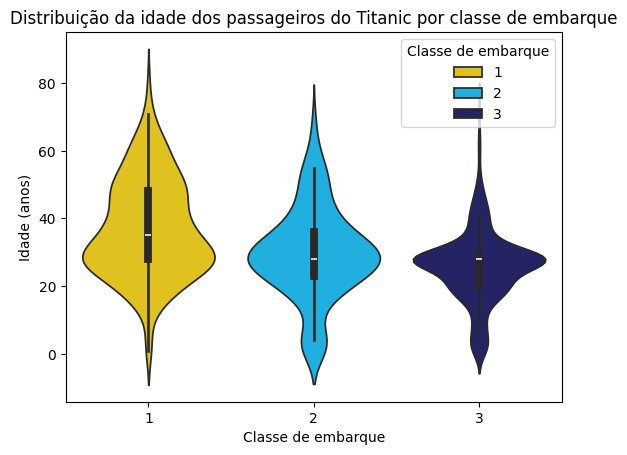

In [24]:
# Violinplot
sns.violinplot(data=dataset, x='Pclass', y='Age', hue='Pclass', palette=['gold', 'deepskyblue', 'midnightblue'], split=False)
plt.xlabel('Classe de embarque')
plt.ylabel('Idade (anos)')
plt.title('Distribuição da idade dos passageiros do Titanic por classe de embarque')
plt.legend(title='Classe de embarque')
plt.show()

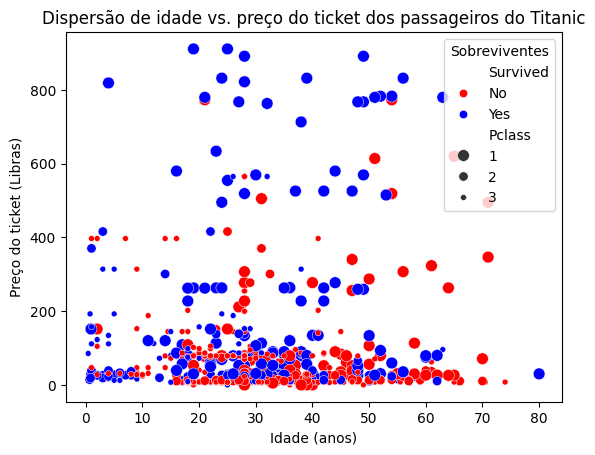

In [23]:
# Gráfico de dispersão
sns.scatterplot(data=dataset, x='Age', y='Fare', hue='Survived', size='Pclass', palette=['red', 'blue'])
plt.xlabel('Idade (anos)')
plt.ylabel('Preço do ticket (Libras)')
plt.title('Dispersão de idade vs. preço do ticket dos passageiros do Titanic')
plt.legend(title='Sobreviventes')
plt.show()